<a href="https://colab.research.google.com/github/taravatp/Facial_Keypoint_Detection/blob/main/train_pretrained_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [ ]:
cd "/content/drive/MyDrive/facial_keypoint_detection/"

/content/drive/MyDrive/facial_keypoint_detection


In [ ]:
!pip install import_ipynb 

In [ ]:
import torchvision
from torchvision import models,datasets,transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np,pandas as pd,os,glob,cv2
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader,Dataset,TensorDataset
from sklearn import cluster
from sklearn.model_selection import train_test_split

import import_ipynb

In [ ]:
import dataset 
from dataset import facial_keypoint

importing Jupyter notebook from dataset.ipynb


In [ ]:
!pip install torch_summary
from torchsummary import summary

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# preparing data


In [ ]:
data_directory ='/content/drive/MyDrive/facial_keypoint_detection/P1_Facial_Keypoints/data/training/'
data = pd.read_csv('/content/drive/MyDrive/facial_keypoint_detection/P1_Facial_Keypoints/data/training_frames_keypoints.csv')
train, test = train_test_split(data,test_size=0.2,random_state=101)

train_data = facial_keypoint(train.reset_index(drop=True),data_directory) #reset index reuslts in all the indices start from 0
test_data = facial_keypoint(test.reset_index(drop=True),data_directory)

data_loader_train = DataLoader(train_data,batch_size=32)
data_loader_test = DataLoader(test_data,batch_size=32)

# Defining model

In [ ]:
model = models.resnet50(pretrained=True)
for param in model.parameters():
  param.requires_grad = False
model.fc = nn.Linear(2048,136) #over writing the last layer of resnet50 model
model = model.to(device)

#Defining loss function, optimizer and hyper-parameters

In [ ]:
loss_function = nn.L1Loss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)
epochs = 10

#Training

In [ ]:
train_loss = []
test_loss = []
RMSE_accuracy = []
for epoch in range(epochs):
  print("epoch number:",epoch)

  epoch_train_loss = 0
  for iteration,(image,keypoints) in enumerate(data_loader_train):
    model.train()
    optimizer.zero_grad()
    prediction = model(image.to(device))
    batch_loss = loss_function(prediction,keypoints)
    batch_loss.backward()
    optimizer.step()
    epoch_train_loss += batch_loss.item()
  train_loss.append(epoch_train_loss/(iteration+1))
  print(f"train loss:{epoch_train_loss/(iteration+1)}")

  epoch_test_loss = 0
  for iteration,(image,keypoints) in enumerate(data_loader_test):
    model.eval()
    prediction = model(image.to(device))
    test_batch_loss = loss_function(prediction,keypoints)
    epoch_test_loss += test_batch_loss.item()
  test_loss.append(epoch_test_loss/(iteration+1))
  print(f"test loss:{epoch_test_loss/(iteration+1)}")

  losses = []
  #num_emxamples = 0
  for iteration, (image,keypoints) in enumerate(data_loader_test):
    model.eval()
    prediction = model(image.to(device))
    rmse = nn.MSELoss()(prediction,keypoints)
    #num_emxamples += prediction.shape[0]
    losses.append(rmse)
  RMSE_accuracy.append(sum(losses) ** 0.5)
  print(f"RMSE accuracy:{sum(losses) ** 0.5}")
  torch.save(model.state_dict(),f"model_epoch:{epoch}")


epoch number: 0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


train loss:0.16449464121084104
test loss:0.12932760945775293
RMSE accuracy:0.7696636915206909
epoch number: 1
train loss:0.11105980578510241
test loss:0.10578412528742444
RMSE accuracy:0.6304723620414734
epoch number: 2
train loss:0.09263206641564424
test loss:0.09172176400368864
RMSE accuracy:0.5454592108726501
epoch number: 3
train loss:0.08144294136557086
test loss:0.08292574367739937
RMSE accuracy:0.4927995204925537
epoch number: 4
train loss:0.07410568975169084
test loss:0.07748381996696646
RMSE accuracy:0.46002617478370667
epoch number: 5
train loss:0.0692468922285513
test loss:0.07319776307452809
RMSE accuracy:0.43460074067115784
epoch number: 6
train loss:0.06556707582083242
test loss:0.07041889462958682
RMSE accuracy:0.4179430305957794
epoch number: 7
train loss:0.06284434810794633
test loss:0.0681604380634698
RMSE accuracy:0.4045052230358124
epoch number: 8
train loss:0.06087012559004214
test loss:0.06640385514633222
RMSE accuracy:0.394173800945282
epoch number: 9
train loss:

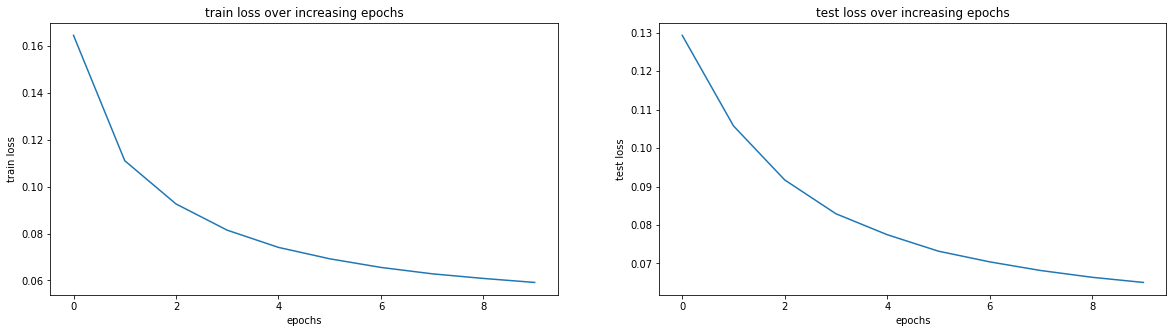

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('train loss over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('train loss')
plt.plot(train_loss)
plt.subplot(122)
plt.title('test loss over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.plot(test_loss)

In [ ]:
print(train_loss)
print(test_loss)

[0.16449464121084104, 0.11105980578510241, 0.09263206641564424, 0.08144294136557086, 0.07410568975169084, 0.0692468922285513, 0.06556707582083242, 0.06284434810794633, 0.06087012559004214, 0.05916493758559227]
[0.12932760945775293, 0.10578412528742444, 0.09172176400368864, 0.08292574367739937, 0.07748381996696646, 0.07319776307452809, 0.07041889462958682, 0.0681604380634698, 0.06640385514633222, 0.06506459990685637]


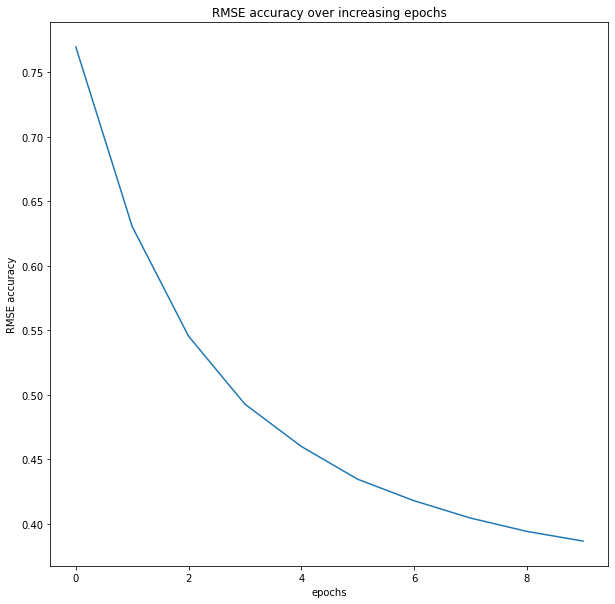

In [ ]:
plt.figure(figsize=(10,10))
plt.title('RMSE accuracy over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('RMSE accuracy')
plt.plot(RMSE_accuracy)

In [ ]:
print(RMSE_accuracy)

[tensor(0.7697, device='cuda:0', grad_fn=<PowBackward0>), tensor(0.6305, device='cuda:0', grad_fn=<PowBackward0>), tensor(0.5455, device='cuda:0', grad_fn=<PowBackward0>), tensor(0.4928, device='cuda:0', grad_fn=<PowBackward0>), tensor(0.4600, device='cuda:0', grad_fn=<PowBackward0>), tensor(0.4346, device='cuda:0', grad_fn=<PowBackward0>), tensor(0.4179, device='cuda:0', grad_fn=<PowBackward0>), tensor(0.4045, device='cuda:0', grad_fn=<PowBackward0>), tensor(0.3942, device='cuda:0', grad_fn=<PowBackward0>), tensor(0.3866, device='cuda:0', grad_fn=<PowBackward0>)]
